<a href="https://colab.research.google.com/github/gunavc/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff=pd.read_csv(file_name)

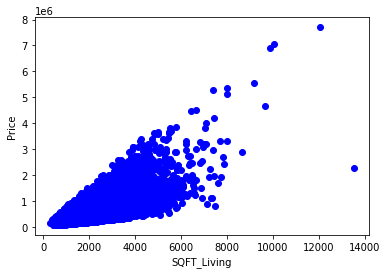

Coefficient : [[281.83375216]] Intercept : [-45850.76735561]
mae : 8.01952622105321 mse : 3093754.956167733


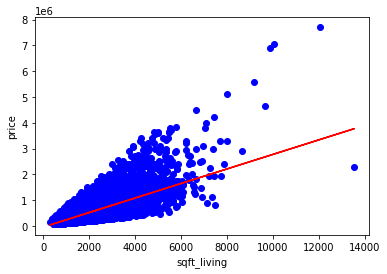

In [60]:

#start here 
dff_new = dff.drop("id",axis=1)
dff_new = dff_new.drop("Unnamed: 0",axis=1)
dff_new.describe()

#Start your code here 
##plotted for your reference 
plt.scatter(dff.sqft_living, dff.price,  color='blue')
plt.xlabel("SQFT_Living")
plt.ylabel("Price")
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(dff,dff,test_size=.2,random_state=4)

regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[["sqft_living"]])
train_y = np.asanyarray(X_train[["price"]])
regr.fit(train_x,train_y)
print("Coefficient :",regr.coef_,"Intercept :",regr.intercept_)
plt.scatter(train_x,train_y, color='blue')
plt.plot(train_x, train_x*regr.coef_[0][0]+regr.intercept_[0], '-r')
plt.xlabel("sqft_living")
plt.ylabel("price")

#start here 
test_x = np.asanyarray(X_test[["sqft_living"]])
test_y = np.asanyarray(X_test[["price"]])
test_y_ = regr.predict(test_x)
mae = np.mean(np.absolute(test_y_-test_y))
mae_ = mae/21613
mse = np.mean((test_y_-test_y)**2)
mse_ = mse/21613
print("mae :",mae_, "mse :",mse_)



From the result, it can be inferred that predicting the price using sqft as the parameter is not accurate.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Coefficient : [[122662.76882332]] Intercept : [126142.34109505]
mae : 10.152630822061461 mse : -0.05094736774754519


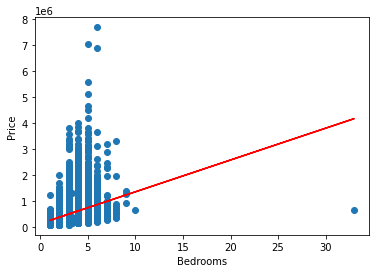

In [61]:
#PREDICTING PRICE USING BEDROOMS AS A PARAMETER
# bedroom_mean = dff["bedrooms"].mean(axis=0)
# dff["bedrooms"].replace(np.nan, bedroom_mean, inplace=True)
# print(bedroom_mean)

X_train.fillna(X_train.mean(), inplace=True)
train_x = np.asanyarray(X_train[["bedrooms"]])
train_y = np.asanyarray(X_train[["price"]])
regr.fit(train_x, train_y)
print("Coefficient :",regr.coef_,"Intercept :",regr.intercept_)

plt.scatter(train_x,train_y)
plt.plot(train_x, train_x*regr.coef_[0][0]+regr.intercept_, '-r')
plt.xlabel("Bedrooms")
plt.ylabel("Price")

X_test.fillna(X_train.mean(), inplace=True)
test_x = np.asanyarray(X_test[["bedrooms"]])
test_y = np.asanyarray(X_test[["price"]])
predict_y = regr.predict(test_x)

mae = np.mean(np.absolute(predict_y-test_y))
mae_ = mae/21613
mse = np.mean((predict_y-test_y))
mse_ = mse/21613
print("mae :",mae_,"mse :",mse_)
               

From the result, it can be inferred that predicting the price using number of bedrooms as the parameter is not accurate.

coefficient : [[176903.28625488]] Intercept : [275922.04073716]
mae : 10.318775527860838 mse : 5614093.94515966


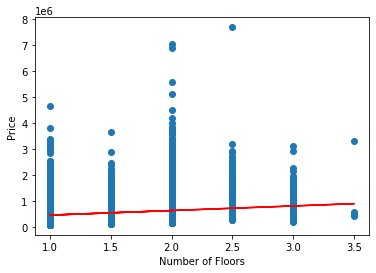

In [62]:
#PREDICTING USING FLOORS
train_x = np.asanyarray(X_train[["floors"]])
train_y = np.asanyarray(X_train[["price"]])
regr.fit(train_x, train_y)
print("coefficient :",regr.coef_,"Intercept :",regr.intercept_)

plt.scatter(train_x, train_y)
plt.plot(train_x, train_x*regr.coef_ +regr.intercept_, '-r')
plt.xlabel("Number of Floors")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[["floors"]])
test_y = np.asanyarray(X_test[["price"]])
predict_y = regr.predict(test_x)
mae = np.mean(np.absolute(predict_y-test_y))
mae_ = mae/21613
mse = np.mean((predict_y-test_y)**2)
mse_ = mse/21613
print("mae :",mae_,"mse :",mse_)


From the results, we can infer that predicting the house price using number of floors as a parameter is not accurate.

Coefficient : [[17837.15609455]] Intercept:  [478946.15026433]
mae : 10.687352878017839 mse:  5968981.7782096965


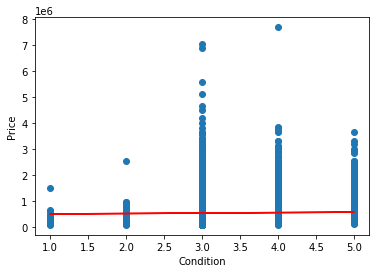

In [63]:
#PREDICTING USING CONDITION
train_x = np.asanyarray(X_train[["condition"]])
train_y = np.asanyarray(X_train[["price"]])
regr.fit(train_x, train_y)
print("Coefficient :",regr.coef_,"Intercept: ",regr.intercept_)

plt.scatter(train_x, train_y)
plt.plot(train_x, train_x*regr.coef_[0][0] + regr.intercept_, '-r')
plt.xlabel("Condition")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[["condition"]])
test_y = np.asanyarray(X_test[["price"]])
predict_y = regr.predict(test_x)
mae = np.mean(np.absolute(predict_y-test_y))
mae_ = mae/21613
mse = np.mean((predict_y-test_y)**2)
mse_ = mse/21613
print("mae :",mae_,"mse: ",mse_)


From the results, we can infer that predicting the house price using the condition of the house as a parameter is not accurate.